In [2]:
import torch
from torchvision import datasets, transforms
import re
from torch.utils.data import random_split
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import EXACTALIB as exc
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#preprocessing gambar
transform = transforms.Compose([transforms.Resize(48),                                
                                transforms.ToTensor()])


#load dataset
dataset = datasets.ImageFolder('C:/Users/numan/Work/Skin_Cancer detection/archive (3)', transform = transform)


#pisah menjadi train dan test
train_set, val_set = random_split(dataset, [9015, 1000])
train_loader = DataLoader(train_set, shuffle=True)
test_loader = DataLoader(val_set, shuffle=True)
train_idx = train_set.indices
test_idx = val_set.indices


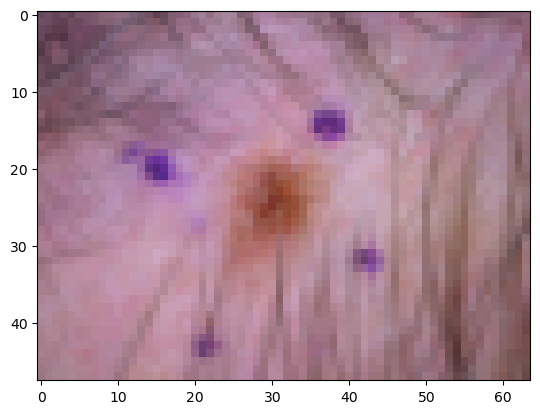

In [4]:
net = exc.Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
show_img = next(iter(train_loader))[0][0]
plt.imshow( transforms.ToPILImage()(show_img))
obj = exc.get_target()
epochs = 2

In [5]:
for epoch in range(epochs):
    running_loss = 0.0
    for i,data in enumerate(train_loader):
        idex = obj.get(train_idx[i])
        target = torch.zeros([1,7])
        target[0][idex-1] = 1
        img = data[0]
        
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        #forward + backward + optimize
        outputs = net(img)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 1.215
[1,  4000] loss: 1.129
[1,  6000] loss: 1.150
[1,  8000] loss: 1.138
[2,  2000] loss: 1.142
[2,  4000] loss: 1.127
[2,  6000] loss: 1.149
[2,  8000] loss: 1.138
Finished Training


In [8]:
PATH = './CNN_2.pth'
torch.save(net.state_dict(), PATH)

In [9]:
dataiter = iter(test_loader)
images, labels = next(dataiter)



In [10]:
net = exc.Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [38]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for i,data in enumerate(test_loader):
        images = data[0]
        # calculate outputs by running images through the network
        outputs = net(images)
        outputs = outputs[0]
        print(outputs)
        # the class with the highest energy is what we choose as prediction
        predicted = torch.argmax(outputs[0])
        labels = obj.get(test_idx[i])
        
        total += len(test_idx)
        
        
        correct += (predicted == labels).sum().item()
        
print(correct)
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

tensor([ 2.3869,  0.4851,  0.7290,  0.0525, -0.5602, -1.5809, -1.3275])
tensor([ 2.3869,  0.4851,  0.7290,  0.0525, -0.5602, -1.5809, -1.3275])
tensor([ 2.3869,  0.4851,  0.7290,  0.0525, -0.5602, -1.5809, -1.3275])
tensor([ 2.3869,  0.4851,  0.7290,  0.0525, -0.5602, -1.5809, -1.3275])
tensor([ 2.3868,  0.4851,  0.7289,  0.0524, -0.5600, -1.5808, -1.3274])
tensor([ 2.3869,  0.4851,  0.7290,  0.0525, -0.5602, -1.5809, -1.3275])
tensor([ 2.3868,  0.4851,  0.7289,  0.0525, -0.5601, -1.5809, -1.3274])
tensor([ 2.3870,  0.4853,  0.7291,  0.0526, -0.5601, -1.5811, -1.3276])
tensor([ 2.3869,  0.4851,  0.7290,  0.0525, -0.5602, -1.5809, -1.3275])
tensor([ 2.3869,  0.4851,  0.7290,  0.0525, -0.5602, -1.5809, -1.3275])
tensor([ 2.3869,  0.4851,  0.7290,  0.0525, -0.5602, -1.5809, -1.3275])
tensor([ 2.3869,  0.4851,  0.7290,  0.0525, -0.5602, -1.5809, -1.3275])
tensor([ 2.3869,  0.4851,  0.7290,  0.0525, -0.5602, -1.5809, -1.3275])
tensor([ 2.3869,  0.4851,  0.7290,  0.0525, -0.5602, -1.5809, -1